In [11]:
import import_ipynb
import matplotlib.pyplot as plt
import numpy as np
from shared_functions import generate_laguerre_polynomials
from shared_functions import hinv

In [12]:
# Generate Laguerre polynomials
num_terms = 100
laguerre_polynomials = generate_laguerre_polynomials(num_terms)

#Verify that it returns the correct inverse
z=0.99999
hz=np.arctanh(z)/(z)
logepsZvec = hinv(hz, laguerre_polynomials)
epsZvec = np.exp(logepsZvec)
zvec = 1 - epsZvec

print(z, zvec)

0.99999 0.9999900011705504


In [14]:
def analytical_sol(N, eps):

    hy = 0.5 * (np.log(2-eps) - np.log(eps)) / (1-eps)
    alpha =  hinv((1/N) * (hy) - (1/N) + 1, laguerre_polynomials)	  
    
    z = 1 -	np.exp(alpha)
    
    phiA = z * ((2.0-eps) / (z+(1.0-eps)))
    phiB = z * ((eps) / (z+(1.0-eps)))
    bvec = phiA + phiB
    term1 = (1/N - 1.0) / (bvec)
    term2 = (np.log(1+z)-np.log(1-z))/(bvec**(2) * (1.0-eps))
    chi = term1 + term2
    return (phiA, phiB, chi)


[1.0161032839257107, 1.0488469121917812]
16 16


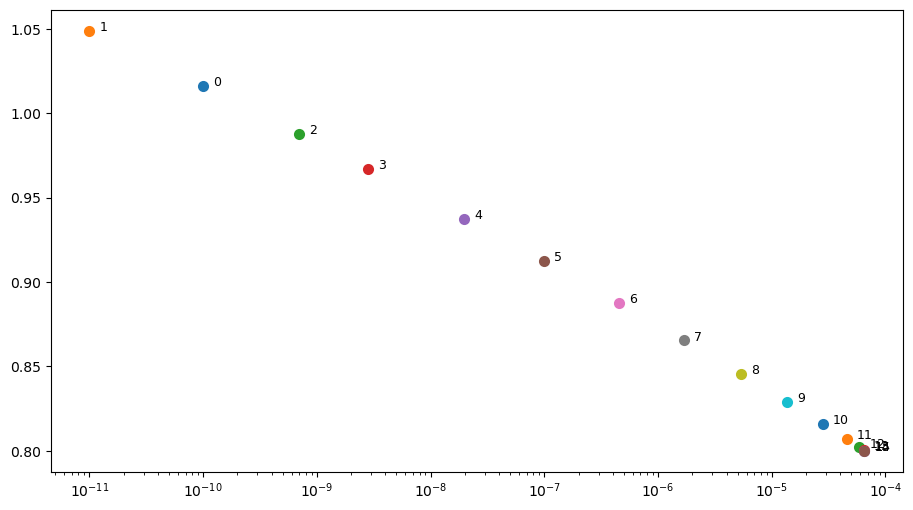

15


In [78]:
chi = 10
chi_target = 0.8
tol = 1e-6
eps0 = 1e-10
eps1 = 1e-11
i=1
eps_vec = [eps0, eps1]
N=100

phiA, phiB, chi0 = analytical_sol(N, eps0)
phiA, phiB, chi1 = analytical_sol(N, eps1)
plt.figure(figsize=(11, 6))
chi_list = [chi0, chi1]

while abs(chi - chi_target) > tol:

    epsi = eps_vec[i]
    epsi_m1 = eps_vec[i-1]
    if i == 1:
        phiA, phiB, chi = analytical_sol(N, epsi)
    if i == 1:
        phiA_m1, phiB_m1, chi_m1 = analytical_sol(N, epsi_m1)
    fepsi_m1 = chi_m1 - chi_target
    fepsi = chi -chi_target

    
    fp_i = (fepsi - fepsi_m1)/ (epsi - epsi_m1)
    epsi_p1 = epsi - (fepsi / fp_i)
    phiA_p1, phiB_p1, chi_p1 = analytical_sol(N, epsi_p1)

    eps_vec.append(epsi_p1)
    chi_list.append(chi_p1)
    chi_m1 = chi
    chi = chi_p1
    i+=1
    
# Plotting
for i in range(len(eps_vec)):
    plt.scatter(eps_vec[i], chi_list[i], linewidth=2, label=f'i={i}')
    plt.annotate(f'{i}', xy=(eps_vec[i], chi_list[i]), xytext=(10, 0), textcoords='offset pixels', fontsize=9)


plt.xscale('log')

plt.show()


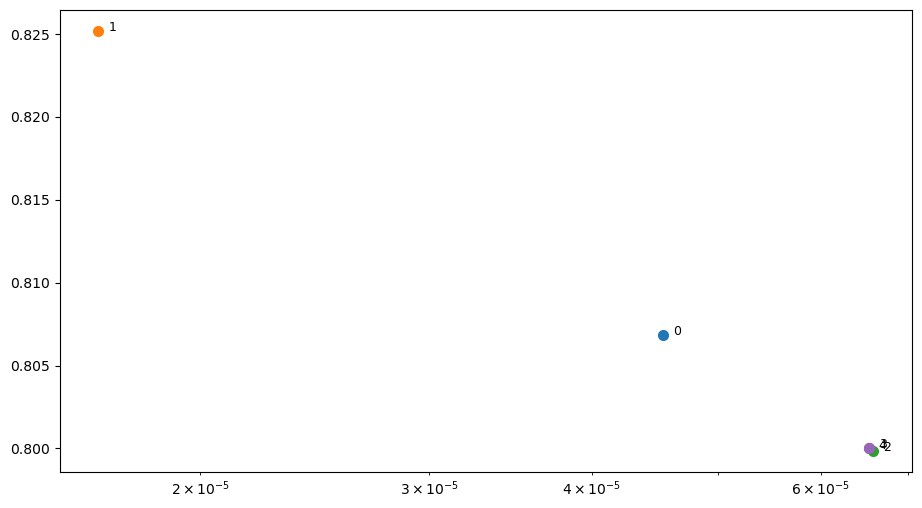

4


In [80]:
chi = 10
chi_target = 0.8
tol = 1e-6
u0 = -10
u1 = -11
i=1
u_vec = [u0, u1]
N=100

phiA, phiB, chi0 = analytical_sol(N, np.exp(u0))
phiA, phiB, chi1 = analytical_sol(N, np.exp(u1))
plt.figure(figsize=(11, 6))
chi_list = [chi0, chi1]

while abs(chi - chi_target) > tol:

    ui = u_vec[i]
    ui_m1 = u_vec[i-1]
    if i == 1:
        phiA, phiB, chi = analytical_sol(N, np.exp(ui))
    if i == 1:
        phiA_m1, phiB_m1, chi_m1 = analytical_sol(N, np.exp(ui_m1))
    fui_m1 = chi_m1 - chi_target
    fui = chi -chi_target

    
    fp_i = (fui - fui_m1)/ (ui - ui_m1)
    ui_p1 = ui - (fui / fp_i)
    phiA_p1, phiB_p1, chi_p1 = analytical_sol(N, np.exp(ui_p1))

    u_vec.append(ui_p1)
    chi_list.append(chi_p1)
    chi_m1 = chi
    chi = chi_p1
    i+=1
    
# Plotting
for i in range(len(u_vec)):
    plt.scatter(np.exp(u_vec[i]), chi_list[i], linewidth=2, label=f'i={i}')
    plt.annotate(f'{i}', xy=(np.exp(u_vec[i]), chi_list[i]), xytext=(10, 0), textcoords='offset pixels', fontsize=9)


plt.xscale('log')

plt.show()

print(i)